/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
last updated: 2020-07-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45936 entries, 0 to 45935
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  13728 non-null  object 
 1   Country/Region  45936 non-null  object 
 2   Lat             45936 non-null  float64
 3   Long            45936 non-null  float64
 4   Date            45936 non-null  object 
 5   Confirmed       45936 non-null  int64  
 6   Deaths          45936 non-null  int64  
 7   Recovered       45936 non-null  int64  
 8   Active          45936 non-null  int64  
 9   WHO Region      45936 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.5+ MB


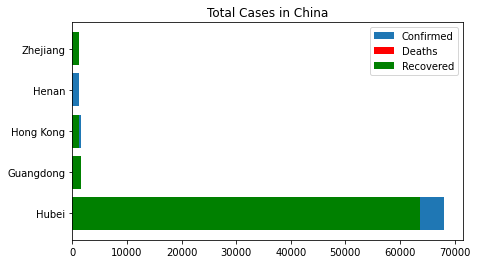

/content/drive/My Drive/Global Analysis Covid 19/COVID-19 Project/python notebooks/eda1.py:58: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daywise = data.groupby(['Date'])['Confirmed', 'Deaths'].agg([sum])


<Figure size 432x288 with 0 Axes>

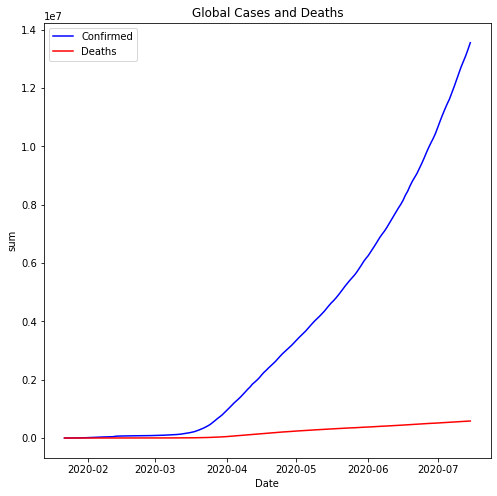

/content/drive/My Drive/Global Analysis Covid 19/COVID-19 Project/python notebooks/eda1.py:74: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  countrywise = data.groupby(['Country/Region','Date'])['Confirmed', 'Deaths', 'Recovered'].agg(sum)


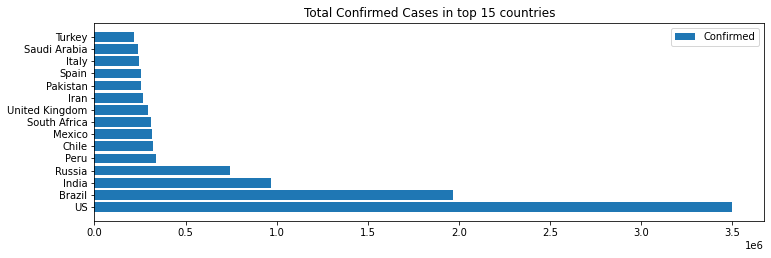

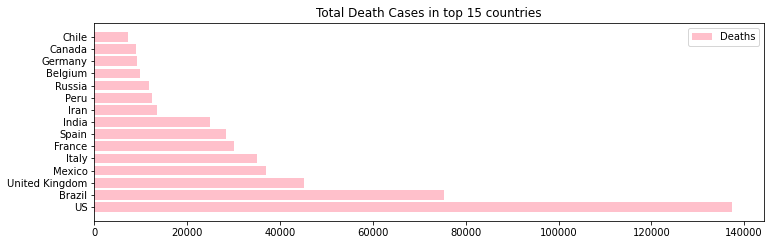

/content/drive/My Drive/Global Analysis Covid 19/COVID-19 Project/python notebooks/eda1.py:111: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c_growth = country.groupby(['Date'])['Confirmed', 'Deaths' , 'Recovered'].agg(sum)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


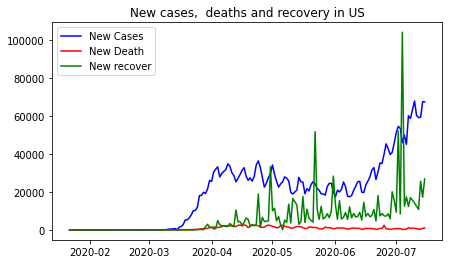

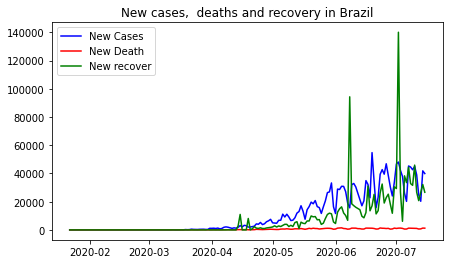

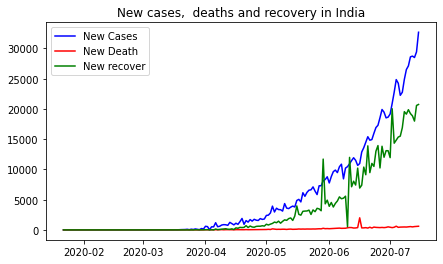

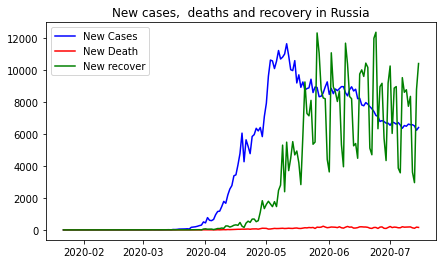

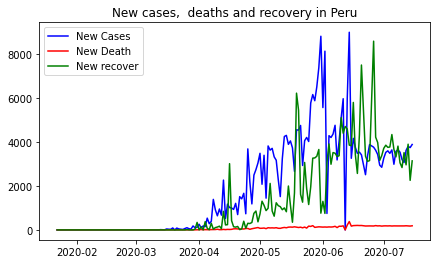

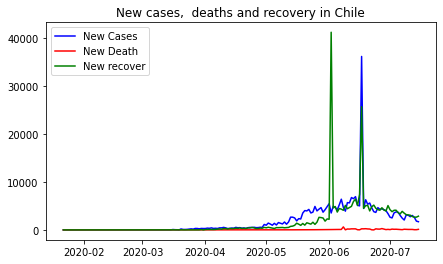

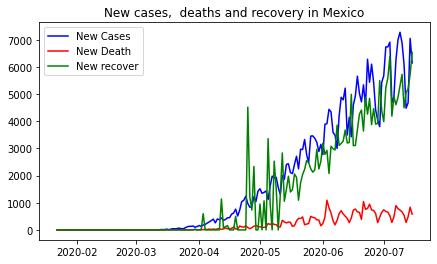

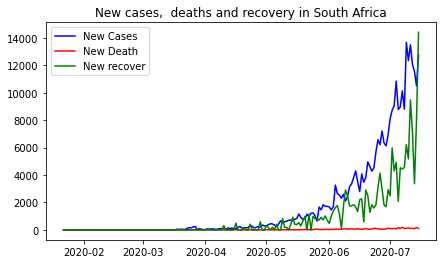

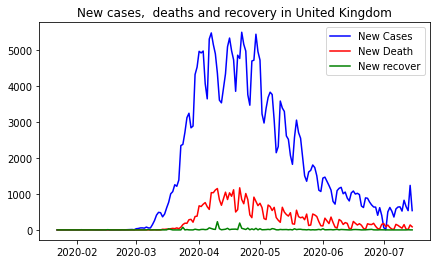

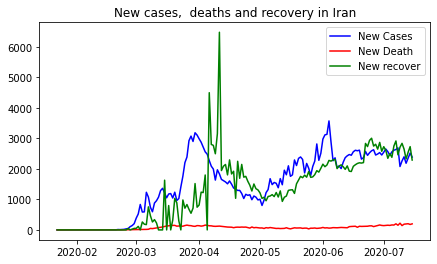

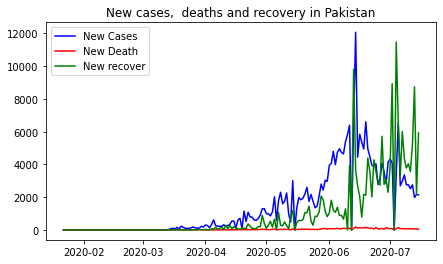

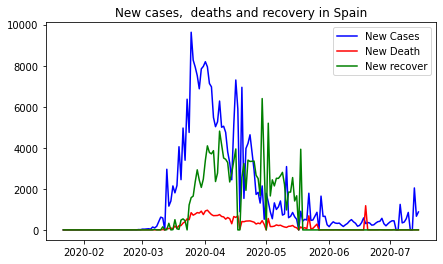

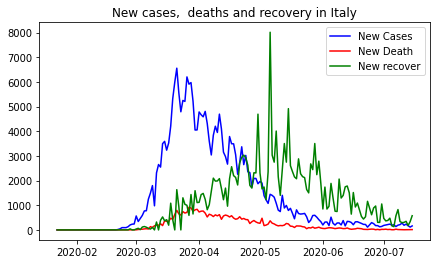

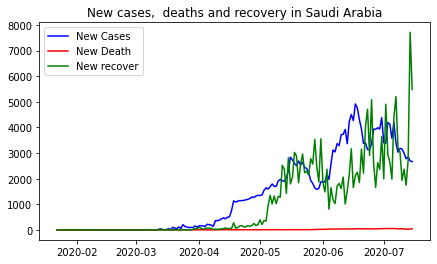

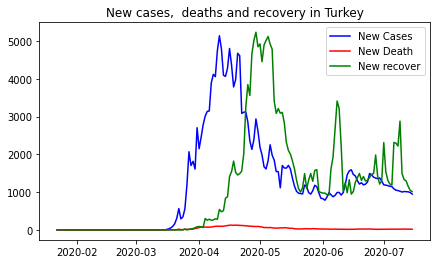

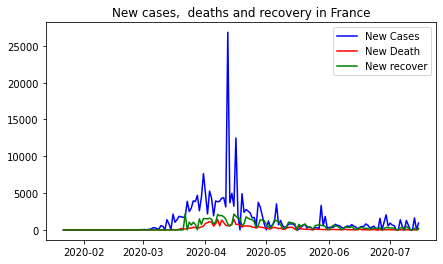

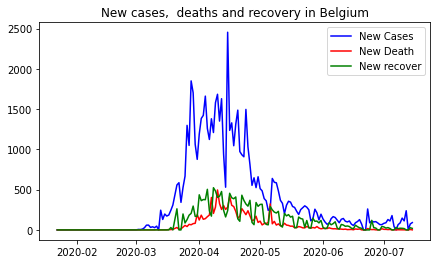

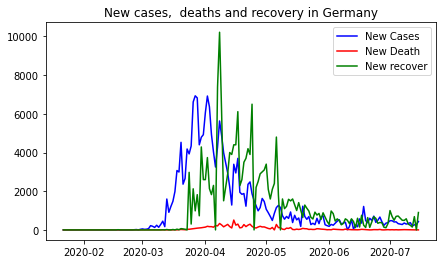

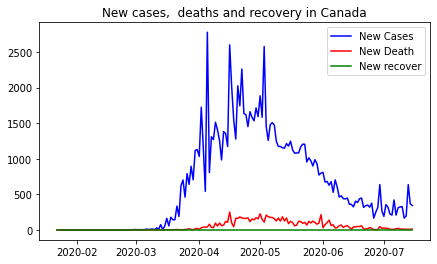

/content/drive/My Drive/Global Analysis Covid 19/COVID-19 Project/python notebooks/eda1.py:152: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  map_data1 = map_data.groupby(['Country/Region'])['Confirmed', 'Deaths', 'Recovered'].agg(sum)
/content/drive/My Drive/Global Analysis Covid 19/COVID-19 Project/python notebooks/eda1.py:154: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  map_data2 = map_data.groupby(['Country/Region'])['Lat', 'Long'].agg(np.mean)


(-200, 170, -75, 100)


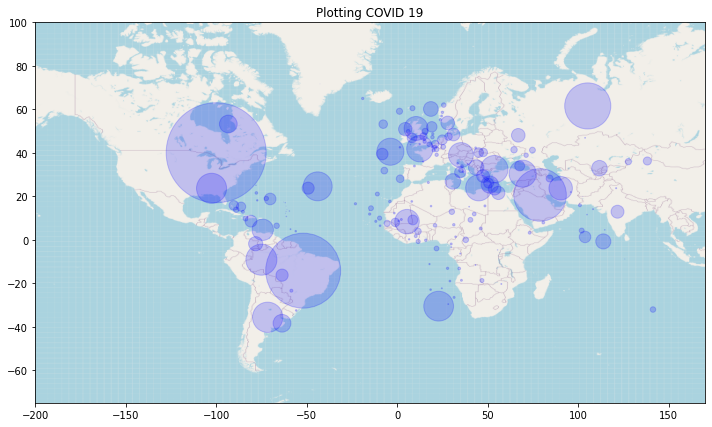

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sys.path.append('/content/drive/My Drive/Global Analysis Covid 19/COVID-19 Project/python notebooks')
import eda1

In [44]:
rawdata = eda1.daywise
#rawdata.columns = rawdata.columns.droplevel(1)
rawdata['Time'] = np.array(range(rawdata.shape[0]))
rawdata.head()

,Date,Confirmed,Deaths,Time
0,2020-01-22,555,17,0
1,2020-01-23,654,18,1
2,2020-01-24,941,26,2
3,2020-01-25,1434,42,3
4,2020-01-26,2118,56,4


In [45]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
data = rawdata.rename(columns={'Date': 'ds', 'Confirmed': 'y'})
# Put market cap in thousands
data['y'] = data['y'] / 1e5
# Make the prophet model and fit on the data
model_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
model_prophet.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
model_forecast = model_prophet.make_future_dataframe(periods=30 * 2 ,freq='D')
# Make predictions
model_forecast = model_prophet.predict(model_forecast)

Text(0.5, 1.0, 'Global Confirmed Cases')

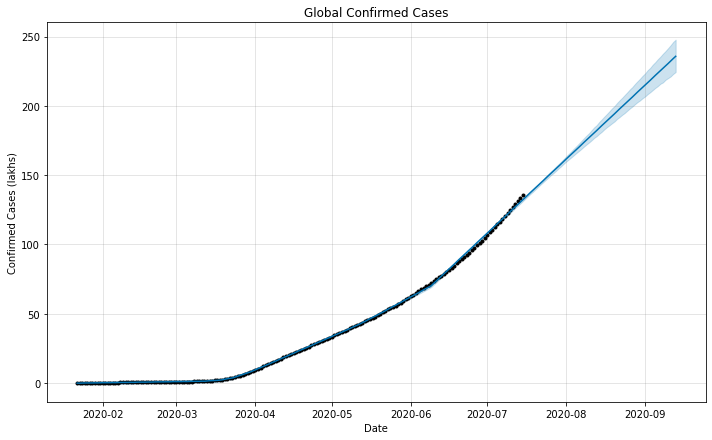

In [47]:
model_prophet.plot(model_forecast, xlabel = 'Date', ylabel = 'Confirmed Cases (lakhs)')
plt.title('Global Confirmed Cases')

In [48]:

# Prophet requires columns ds (Date) and y (value)
data = rawdata.rename(columns={'Date': 'ds', 'Deaths': 'y'})
# Put market cap in thousands
#data['y'] = data['y'] / 1e5
# Make the prophet model and fit on the data
model_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
model_prophet.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
model_forecast = model_prophet.make_future_dataframe(periods=30 * 2 ,freq='D')
# Make predictions
model_forecast = model_prophet.predict(model_forecast)

Text(0.5, 1.0, 'Global Confirmed Deaths')

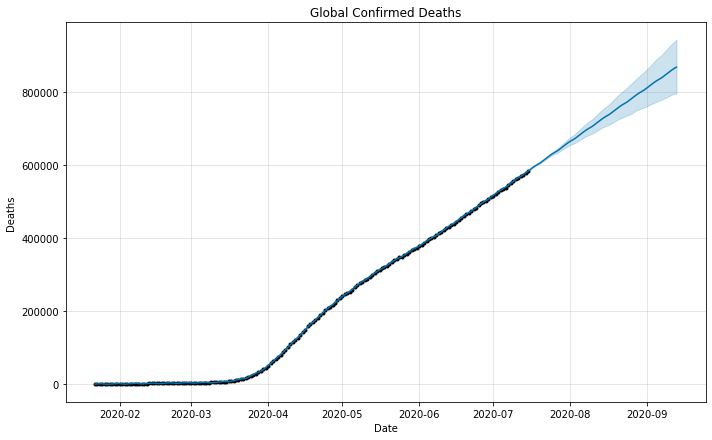

In [50]:
model_prophet.plot(model_forecast, xlabel = 'Date', ylabel = 'Deaths ')
plt.title('Global Confirmed Deaths')

In [58]:
database = eda1.database
countrylist = eda1.maxrowsf

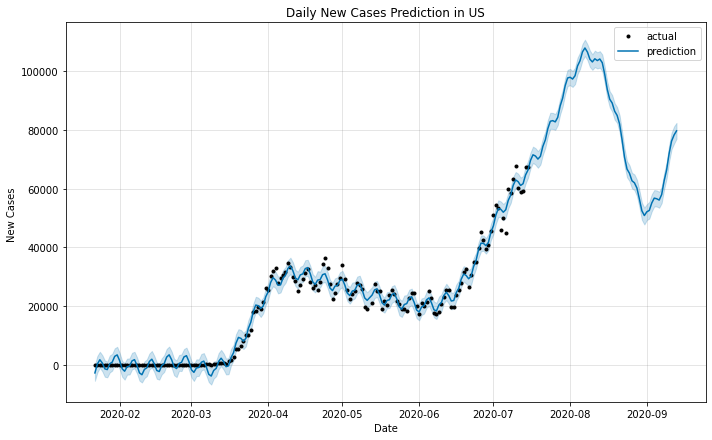

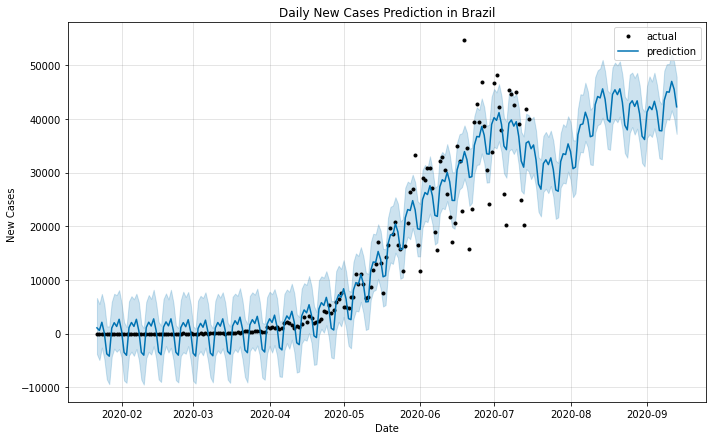

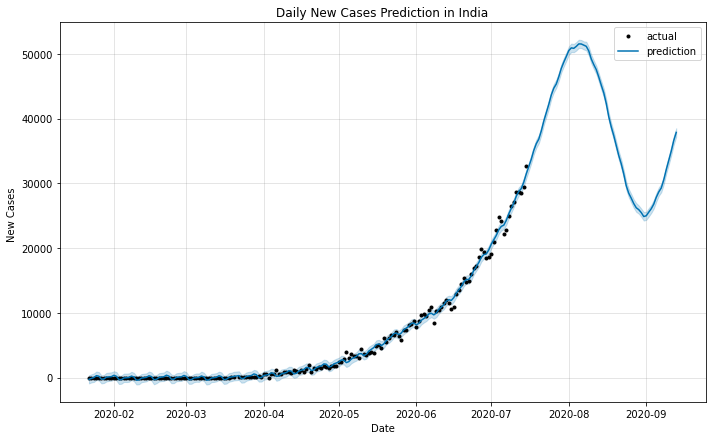

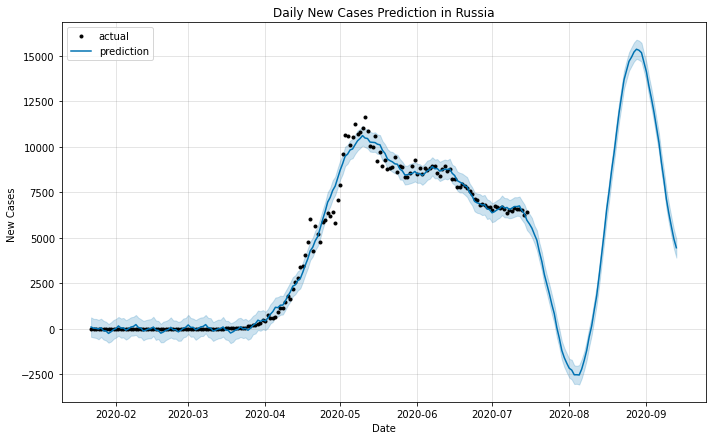

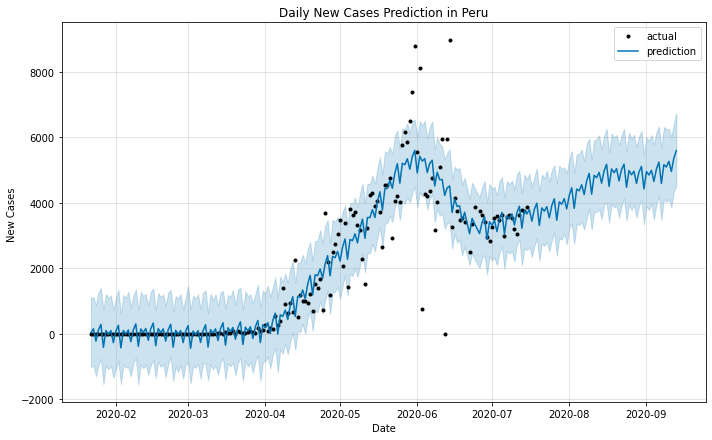

In [62]:
for index, value in enumerate(countrylist[:5]):
  name = value
  rawdata2 = pd.DataFrame(database[index])
  #rawdata2.reset_index(inplace= True)
  # Prophet requires columns ds (Date) and y (value)
  data = rawdata2.rename(columns={'Date': 'ds', 'new_conf': 'y'})
  # Put market cap in thousands
  #data['y'] = data['y'] / 1e5
  # Make the prophet model and fit on the data
  model_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, daily_seasonality = True, yearly_seasonality = True)
  model_prophet.fit(data)
  model_forecast = model_prophet.make_future_dataframe(periods=30 * 2 ,freq='D')
  # Make predictions
  model_forecast = model_prophet.predict(model_forecast)
  model_prophet.plot(model_forecast, xlabel = 'Date', ylabel = 'New Cases ')
  plt.legend(['actual', 'prediction'])
  plt.title('Daily New Cases Prediction in ' + str(name))

